In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude, longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
longs = np.random.uniform(-180.000, 180.000, size=1500)

lat_lngs = zip(lats,longs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the city for each latitude/longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, we add it to "cities" list
    if city not in cities:
        cities.append(city)
# Print the length of the cities list to confirm sufficient count
len(cities)

602

In [9]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to store city data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 since we can only call 60 in a minute
    if (i % 50 ==0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url for city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of set {set_count} | {city}")
    
    # Increase the record count by 1
    record_count += 1
    
    # Run an API request for each city
    try:
        # Retrieve data from url and set to a variable
        city_weather = requests.get(city_url).json()
        
        # Parse JSON object for specific data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append city information to city_data list
        city_data.append({"city": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
        
    # If an Error is received, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | assiniboia
Processing record 2 of set 1 | port alfred
Processing record 3 of set 1 | mae sot
Processing record 4 of set 1 | vaini
Processing record 5 of set 1 | tuktoyaktuk
Processing record 6 of set 1 | umzimvubu
City not found. Skipping...
Processing record 7 of set 1 | volodarka
Processing record 8 of set 1 | busselton
Processing record 9 of set 1 | taolanaro
City not found. Skipping...
Processing record 10 of set 1 | lorengau
Processing record 11 of set 1 | progreso
Processing record 12 of set 1 | saskylakh
Processing record 13 of set 1 | mildura
Processing record 14 of set 1 | jamestown
Processing record 15 of set 1 | iqaluit
Processing record 16 of set 1 | bluff
Processing record 17 of set 1 | dikson
Processing record 18 of set 1 | bambous virieux
Processing record 19 of set 1 | puerto ayora
Processing record 20 of set 1 | qaanaaq
Processing record 21 of set 1 | atuona
Processing record 22 

Processing record 41 of set 4 | ribeira grande
Processing record 42 of set 4 | aberdeen
Processing record 43 of set 4 | pangnirtung
Processing record 44 of set 4 | ossora
Processing record 45 of set 4 | qasigiannguit
Processing record 46 of set 4 | kununurra
Processing record 47 of set 4 | pacific grove
Processing record 48 of set 4 | tazovskiy
Processing record 49 of set 4 | staryy nadym
Processing record 50 of set 4 | xinyu
Processing record 1 of set 5 | vila franca do campo
Processing record 2 of set 5 | manta
Processing record 3 of set 5 | warqla
City not found. Skipping...
Processing record 4 of set 5 | nome
Processing record 5 of set 5 | tuatapere
Processing record 6 of set 5 | saint anthony
Processing record 7 of set 5 | lima
Processing record 8 of set 5 | lalpur
Processing record 9 of set 5 | tiksi
Processing record 10 of set 5 | labuhan
Processing record 11 of set 5 | northam
Processing record 12 of set 5 | bishop auckland
Processing record 13 of set 5 | mount gambier
Processi

Processing record 31 of set 8 | komsomolskiy
Processing record 32 of set 8 | ciudad bolivar
Processing record 33 of set 8 | los llanos de aridane
Processing record 34 of set 8 | vanavara
Processing record 35 of set 8 | kologriv
Processing record 36 of set 8 | cherskiy
Processing record 37 of set 8 | phan thiet
Processing record 38 of set 8 | taree
Processing record 39 of set 8 | manicore
Processing record 40 of set 8 | vostok
Processing record 41 of set 8 | caramoan
Processing record 42 of set 8 | frunze
Processing record 43 of set 8 | phalaborwa
Processing record 44 of set 8 | umm kaddadah
Processing record 45 of set 8 | takoradi
Processing record 46 of set 8 | norman wells
Processing record 47 of set 8 | souillac
Processing record 48 of set 8 | tobol
Processing record 49 of set 8 | georgiyevka
Processing record 50 of set 8 | alugan
Processing record 1 of set 9 | labytnangi
Processing record 2 of set 9 | masuda
Processing record 3 of set 9 | saint-leu
Processing record 4 of set 9 | sm

Processing record 16 of set 12 | lovozero
Processing record 17 of set 12 | shenkursk
Processing record 18 of set 12 | mlonggo
Processing record 19 of set 12 | reshetylivka
Processing record 20 of set 12 | mogadishu
Processing record 21 of set 12 | kuytun
Processing record 22 of set 12 | abu dhabi
Processing record 23 of set 12 | svetlogorsk
Processing record 24 of set 12 | la ronge
Processing record 25 of set 12 | camacupa
Processing record 26 of set 12 | basoko
Processing record 27 of set 12 | vero beach
Processing record 28 of set 12 | ikot ekpene
Processing record 29 of set 12 | bahia blanca
Processing record 30 of set 12 | qaqortoq
Processing record 31 of set 12 | grand gaube
Processing record 32 of set 12 | adelaide
Processing record 33 of set 12 | les cayes
Processing record 34 of set 12 | longwy
Processing record 35 of set 12 | sangar
Processing record 36 of set 12 | port maria
Processing record 37 of set 12 | lubao
Processing record 38 of set 12 | plettenberg bay
Processing rec

In [13]:
# Create a datframe from the list of dictionaries
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,Assiniboia,49.6334,-105.9845,35.42,80,100,11.50,CA,2022-11-23 13:31:46
1,Port Alfred,-33.5906,26.8910,80.19,68,17,5.99,ZA,2022-11-23 13:31:46
2,Mae Sot,16.7167,98.5667,80.42,81,78,1.97,TH,2022-11-23 13:31:47
3,Vaini,-21.2000,-175.2000,77.16,88,20,5.75,TO,2022-11-23 13:31:47
4,Tuktoyaktuk,69.4541,-133.0374,3.33,94,100,8.12,CA,2022-11-23 13:31:48
5,Volodarka,49.5248,29.9122,32.56,94,100,6.22,UA,2022-11-23 13:31:49
6,Busselton,-33.6500,115.3333,60.76,85,98,10.71,AU,2022-11-23 13:31:49
7,Lorengau,-2.0226,147.2712,82.13,76,77,8.72,PG,2022-11-23 13:31:50
8,Progreso,21.2833,-89.6667,73.11,86,24,7.49,MX,2022-11-23 13:31:50
9,Saskylakh,71.9167,114.0833,-38.15,100,86,2.13,RU,2022-11-23 13:31:51


In [17]:
new_column_order = ["city", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind
0,Assiniboia,CA,2022-11-23 13:31:46,49.6334,-105.9845,35.42,80,100,11.50
1,Port Alfred,ZA,2022-11-23 13:31:46,-33.5906,26.8910,80.19,68,17,5.99
2,Mae Sot,TH,2022-11-23 13:31:47,16.7167,98.5667,80.42,81,78,1.97
3,Vaini,TO,2022-11-23 13:31:47,-21.2000,-175.2000,77.16,88,20,5.75
4,Tuktoyaktuk,CA,2022-11-23 13:31:48,69.4541,-133.0374,3.33,94,100,8.12
5,Volodarka,UA,2022-11-23 13:31:49,49.5248,29.9122,32.56,94,100,6.22
6,Busselton,AU,2022-11-23 13:31:49,-33.6500,115.3333,60.76,85,98,10.71
7,Lorengau,PG,2022-11-23 13:31:50,-2.0226,147.2712,82.13,76,77,8.72
8,Progreso,MX,2022-11-23 13:31:50,21.2833,-89.6667,73.11,86,24,7.49
9,Saskylakh,RU,2022-11-23 13:31:51,71.9167,114.0833,-38.15,100,86,2.13


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export data to csv file
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [19]:
# Parse dataframe for relevant data for plot
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind"]

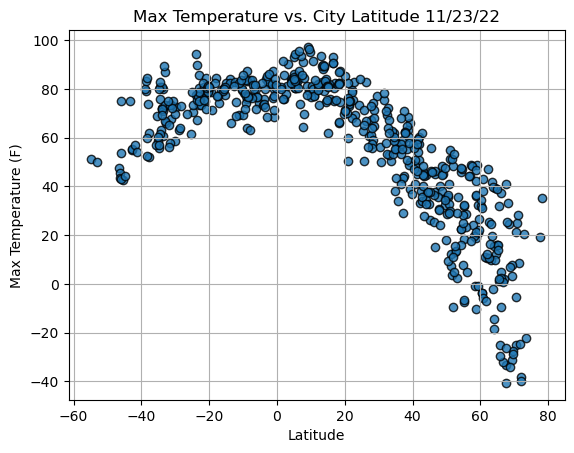

In [21]:
# Build scatter plot
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Max Temperature vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

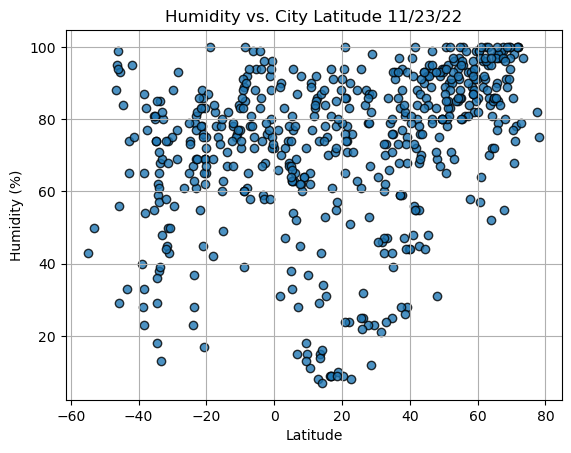

In [22]:
# Build scatter plot
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Humidity vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

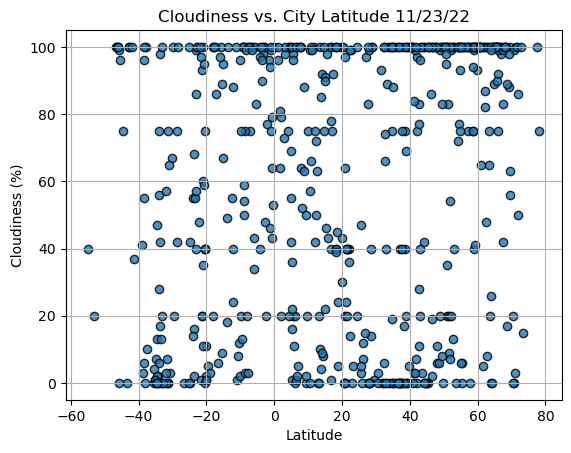

In [23]:
# Build scatter plot
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Cloudiness vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

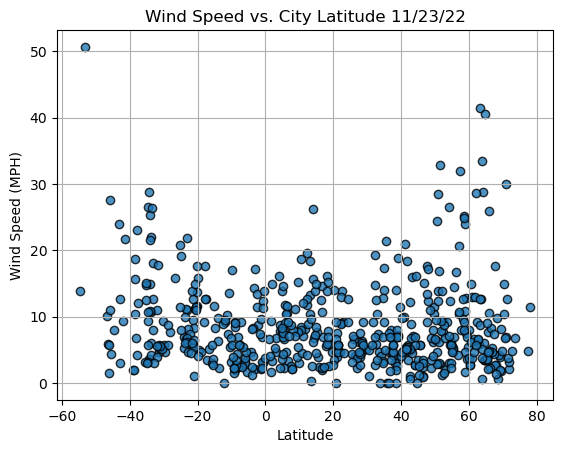

In [24]:
# Build scatter plot
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Wind Speed vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

plt.show()